# Statistical Testing

*A hypothesis* is a statement about an observed random variable's (probabilistic) distribution. A hypothesis can be a statement about some parameter $\theta $ of such distribution, e.g., "the mean height of women is 175 cm".

*A simple hypothesis* $H: \theta = \theta_0$ states that the value of parameter $\theta$ is $\theta_0$ (for some constant $\theta$). On the other side, *a composite hypothesis* $H': \theta \in \Theta_0$ states that the value of $\theta$ is in the set $\Theta_0$.

A hypothesis is tested using observed values $X_1,\dots, X_n$ of a random variable, that is, a random sample, where the values $X_1,\dots, X_n$ are pairwise independent but from the same distribution.

Testing a hypothesis consists of finding a suitable function $T = T(X_1,\dots, X_n)$ called test statistics and a set $R$ of values of the function such that we reject the hypothesis if $T(X_1,\dots, X_n) \in R$. We aim to reject the hypothesis if it is not valid, but we cannot rule out errors. We want to minimize the probability of errors of the following two types. The probability of type I errors:

$$ p_1 = P[\text{we reject } H \mid H \text{ is valid}] $$

and of Type II errors

 $$ p_2 = P[\text{we do not reject } H \mid H \text{ is not valid}]. $$

Instead of minimizing both errors simultaneously, we minimize the type II error while the type I error is limited from above by a constant $\alpha$ (usually 0.05, eventually 0.01, or 0.001). The constant $\alpha$ is called the significance level of the test.


## $\chi^2$-Test

**The "chi-squared" test of independence** determines whether there is a relationship between two categorical variables. Do the values of one category variable depend on the values of the other categorical variable? If both variables are independent, knowing the values of one variable does not give information about the value of the other variable. 

Let us consider the following example. Patients in two hospital departments were observed

[$A$] the department of psychiatry -- sample $A$, and 

[$B$] the department of a general ward (Slovak: interna) -- sample $B$.

The income of the patients was surveyed

* [I] a strongly below-average income,
* [II] a below-average income,
* [II] an average income,
* [IV] an above-average income,
* [V] a strongly above-average income.

The results are in the following table:

Income class | Sample $A$ | Sample $B$ 
:------------:|:----------:|:--------------:
  I          | 17         | 5          
  II         | 25         | 21         
  III        | 39         | 34         
  IV         | 42         | 49         
  V          | 32         | 25         
---------------|--------------|--------------
 Sums        |155         | 134       


Have both samples $A$ and $B$ the same distribution? Test that using $\chi^2$ test of independence with the significance level $\alpha=0.05$. Hence the **null hypothesis $H_0$** is: 

> The variables (*Department* and *Income*) are independent. No relationship exists. In other words:
> * I.e., the difference between the counts in samples $A$ and $B$ are only random.
> * The income does not depend on the type of department.

* What is the alternative hypothesis $H_A$?

Below, we will compute the $\chi^2$-test statistics and decide whether we can reject the null hypothesis.

In [1]:
import numpy as np

In [2]:
table = np.array([[ 17,5],[25,21],[39,34],[42,49],[32,25]],np.float64)
table

array([[17.,  5.],
       [25., 21.],
       [39., 34.],
       [42., 49.],
       [32., 25.]])

In [3]:
# YOUR CODE HERE
row_sums = table.sum(axis=1)
print("Row sums:", row_sums)
col_sums = table.sum(axis=0)
# YOUR CODE HERE
print("Column sume reject Hs:", col_sums)

Row sums: [22. 46. 73. 91. 57.]
Column sume reject Hs: [155. 134.]


In [4]:
expected_table = np.outer(row_sums, col_sums) / table.sum()
expected_table

array([[11.79930796, 10.20069204],
       [24.67128028, 21.32871972],
       [39.15224913, 33.84775087],
       [48.80622837, 42.19377163],
       [30.57093426, 26.42906574]])

In [5]:
x2stat = np.sum(np.power(table-expected_table,2)/expected_table)
x2stat

7.145635224256101

Degrees of freedom: 4


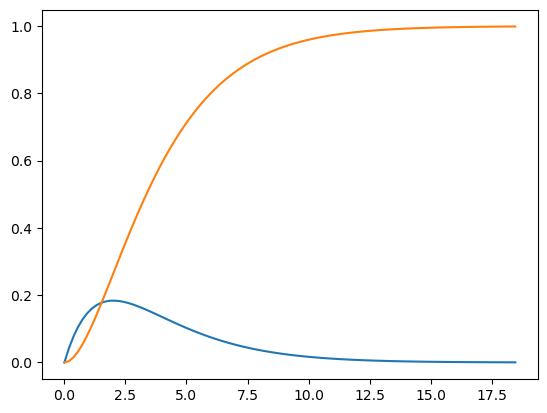

In [6]:
import scipy
from scipy import stats
from matplotlib import pyplot as plt

df = 4
# YOUR CODE HERE
print('Degrees of freedom:', df)
x = np.linspace(0, scipy.stats.chi2.ppf(0.999, df), 100)
pdf_chi2 = scipy.stats.chi2.pdf(x, df)
cdf_chi2 = scipy.stats.chi2.cdf(x, df)
plt.plot(x, pdf_chi2, x, cdf_chi2)

What are the functions `pdf`, `cdf`, `sf`, `ppf`, and `isf` in module `scipy.stats.chi2`?

Answer the following questions using appropriate functions from `scipy.stats.chi2`.

For the significance level $\alpha=0.05$, the boundary value for the $\chi^2$-statistics is

In [7]:
alpha = 0.05

boundary = scipy.stats.chi2.isf(alpha, df)

print(boundary)

9.487729036781158


In [8]:
1 - scipy.stats.chi2.cdf(7.15, df)

0.1281705729170648

In [9]:
scipy.stats.chi2.cdf(7.15, df)

0.8718294270829352

Hence, we can reject the null hypothesis at the significance level $\alpha=0.05$ only if the value of the statistics will be at least 9.4877.

# $\chi^2$-test and Fisher's Test


Compare tires produced on an old and a new production line using both $\chi^2$-test and Fisher's exact test. The counts are the number of tires that did/did not survive a test drive for 40000 km.

production line | survived | not survived | Sum
:---:|:---------:|:------------:|:----:
old  | 38 | 5 | 43 
new  | 20 | 9 | 29 
-------------------|-------------|-----------------|-------
Sum | 58 | 14 | 72 

**The null hypothesis is:**

...

YOUR ANSWER HERE

In [10]:
tires = np.array([[38,5], [20,9]])
tires

array([[38,  5],
       [20,  9]])

In [11]:
row_sums = tires.sum(axis=1)
print("Row sums:", row_sums)
col_sums = tires.sum(axis=0)
print("Column sums:", col_sums)

Row sums: [43 29]
Column sums: [58 14]


In [12]:
expected_tires = np.outer(row_sums,col_sums) / tires.sum()
expected_tires

array([[34.63888889,  8.36111111],
       [23.36111111,  5.63888889]])

## Using $\chi^2$-test

In [13]:
x2stat = np.sum((tires - expected_tires)**2 / expected_tires)
print(x2stat)

4.164287886987884


In [14]:
alpha = 0.05
boundary = scipy.stats.chi2.ppf(1-alpha, 1)
print("Boundary value of the corresponding chi2-statistics is",boundary)
if x2stat >= boundary:
    print("We can reject the null hypothesis that the tires from both lines are of the same quality")
else:
    print("We cannot reject the null hypothesis that the tires from both lines are of the same quality")

Boundary value of the corresponding chi2-statistics is 3.841458820694124
We can reject the null hypothesis that the tires from both lines are of the same quality


In [15]:
print("The probability that the tires from both lines are of the same quality is",
      scipy.stats.chi2.sf(x2stat, df=1))

The probability that the tires from both lines are of the same quality is 0.04128476420642174


## Fisher's exact test

In [16]:
tires

array([[38,  5],
       [20,  9]])

We can consider two tests:
1. a one-tailed test, and
2. a two-tailed test.

Tasks:
* What are the null and alternative hypotheses corresponding to the one-tailed Fisher's test?
* What are the null and alternative hypotheses corresponding to the two-tailed Fisher's test?
* What are the more extreme table contents with the same row and column sums
  * for the one-tailed Fisher's test and
  * for the two-tailed Fisher's test?
* Compute the $p$-value for both one-tailed and two-tailed tests.
* For both tests, answer the following question
  > Is the difference between the quality of tires between the old and new production lines statistically significant?  

In [17]:
from math import factorial

factorial(59)

138683118545689835737939019720389406345902876772687432540821294940160000000000000

In [18]:
f = factorial
p = (f(58) * f(14) * f(43) * f(29)) / (f(38)*f(5)*f(9)*f(20)*f(72))
print(p)

0.03226117522768959


In [19]:
prob

NameError: name 'prob' is not defined

In [ ]:
t = tires.flatten()
t
prob = factorial(t[0]+t[1])*factorial(t[2]+t[3])*factorial(t[0]+t[2])*factorial(t[1]+t[3])/(factorial(t[0])*factorial(t[1])*factorial(t[2])*factorial(t[3])*factorial(sum(t)))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9c17e1ac-b2cc-421e-8492-9f456eb1f406' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>